# NetFlix Movie Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

Data Loading

In [2]:
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


 PreProcessing
- Date ==> replace date Time formate 
- Genre ==> Uniq Item Found
- outlire detection
- Data Preprocessing


Data PreProcessing


In [4]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [5]:
df['Genre'].tail()

9822                   Drama, Crime
9823                         Horror
9824      Mystery, Thriller, Horror
9825          Music, Drama, History
9826    War, Drama, Science Fiction
Name: Genre, dtype: object

In [6]:
df.duplicated().sum()

0

NO Duplicated Value

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


**Exploration Summary**
- This DataSet 9827 Data is available
- No Duplicate Value 
- Release_Date  are needs but it is a Object value and Its Replace with Date Time Formatting, Year, Month    
- Original LAnguage ar Not Mandatory  so this Column will be delete
- Movie OverView Column Are Not important  For this analysis 
- Movie Title is the most important column for this analysis



In [8]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
df['Release_Date']

0      2021-12-15
1      2022-03-01
2      2022-02-25
3      2021-11-24
4      2021-12-22
          ...    
9822   1973-10-15
9823   2020-10-01
9824   2016-05-06
9825   2021-03-31
9826   1984-09-23
Name: Release_Date, Length: 9827, dtype: datetime64[ns]

In [9]:
df['Release_Date']=df['Release_Date'].dt.year

df['Release_Date']

0       2021
1       2022
2       2022
3       2021
4       2021
        ... 
9822    1973
9823    2020
9824    2016
9825    2021
9826    1984
Name: Release_Date, Length: 9827, dtype: int32

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping The Column
- Overview Column
- Poster URL Column
- Original Language Column


In [11]:
cols= ['Overview','Original_Language','Poster_Url']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [13]:
df.drop(cols,axis=1,inplace=True)

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [15]:
unique_values = df['Release_Date'].nunique()


In [16]:
unique_values

102

In [17]:
df['Release_Date'].unique()

array([2021, 2022, 2020, 1986, 2018, 1989, 2012, 2009, 2005, 2019, 2014,
       2016, 2001, 2015, 2002, 2017, 2011, 2007, 2004, 2010, 1972, 2023,
       2008, 1995, 1994, 1992, 2013, 2003, 2006, 1999, 1993, 1985, 1998,
       1950, 1997, 2000, 1991, 1937, 1990, 1977, 1940, 1981, 1942, 1973,
       1941, 1974, 1951, 1996, 1959, 1961, 1967, 1953, 1988, 1956, 1983,
       1976, 1955, 1970, 1984, 1971, 1987, 1963, 1980, 1939, 1975, 1979,
       1982, 1966, 1978, 1965, 1946, 1964, 1968, 1962, 1960, 1957, 1949,
       1922, 2024, 1969, 1954, 1933, 1932, 1958, 1952, 1944, 1931, 1948,
       1938, 1945, 1927, 1925, 1935, 1936, 1902, 1920, 1947, 1943, 1929,
       1926, 1921, 1930])

**"This Data Set Contains information on Films Produced over a 102-year span, from 1930-2022 "**

Genre are Find to Uniq Types

In [18]:
UniqValuesOfGenre= df['Genre'].nunique()
print('Number of unique genres:', UniqValuesOfGenre)

Number of unique genres: 2337


In [19]:
df['Genre'].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], dtype=object)

In [20]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [21]:
df['Genre'].tail()

9822                   Drama, Crime
9823                         Horror
9824      Mystery, Thriller, Horror
9825          Music, Drama, History
9826    War, Drama, Science Fiction
Name: Genre, dtype: object

In [22]:
unique_genres = set()
df['Genre'].dropna().apply(lambda x: unique_genres.update(x.split(', ')))
print("Number of unique genres:", len(unique_genres))
print("Unique genres:", unique_genres)




Number of unique genres: 19
Unique genres: {'Action', 'Fantasy', 'Romance', 'Horror', 'Crime', 'Western', 'Adventure', 'Mystery', 'Music', 'Animation', 'War', 'TV Movie', 'Thriller', 'History', 'Documentary', 'Comedy', 'Family', 'Drama', 'Science Fiction'}


# There are 19 different Genre categories within this data set


- Unique genres: 

    'History', 'Mystery', 'Adventure', 'Western', 'Romance', 'War', 'Documentary', 'Science Fiction', 'Horror', 'Fantasy', 'Drama', 'Comedy', 'Crime', 'Animation', 'Music', 'Action', 'Thriller', 'Family', 'TV Movie'

In [23]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Categories  Vote_Average value and make 4 Categories :
- Popular Movie
- Average Movie
- Low Rated Movie
- Not Popular Movie

In [24]:
'''def Categories_Cols(df,col,labels):

    edges =[
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df
    '''
import pandas as pd

def Categories_Cols(df, col, labels):
    # Ensure labels are provided as a list
    if not isinstance(labels, list):
        raise ValueError("Labels must be provided as a list, not a set.")
    
    # Get quartile-based edges
    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.50),
        df[col].quantile(0.75),
        df[col].max()
    ]
    
    # Use pd.cut to categorize the column
    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop', include_lowest=True)
    
    return df

# Example Usage
labels = ['not_popular', 'below_average', 'Average', 'popular']  # Ensure this is a list
df = Categories_Cols(df, 'Vote_Average', labels)

df


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,Average,"Music, Drama, History"


In [25]:
df['Vote_Average'].unique()

['popular', 'below_average', 'Average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_average' < 'Average' < 'popular']

In [26]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [27]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular      2567
popular          2450
Average          2412
below_average    2398
Name: count, dtype: int64

In [28]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

we'd split the Genre into a list and then explode our data-frame to have only one Genre per row for each movie
 

In [29]:
df['Genre']

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9822                          Drama, Crime
9823                                Horror
9824             Mystery, Thriller, Horror
9825                 Music, Drama, History
9826           War, Drama, Science Fiction
Name: Genre, Length: 9827, dtype: object

In [30]:
df['Genre']=df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [31]:
#casting column into categories
df['Genre']=df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


In [33]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

Data ExPloration And Visualization project:

- what is the most frequent genre of movies Release date
- what genre has height vote
- what is the most frequent genre of movies Release date in the year 2010
- the movie got the height popularity
- which year has the most filmed of the year

In [34]:
# Data Visualization
sns.set_style('whitegrid')

# 1. what is the most frequent genre of movies Release date


In [35]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

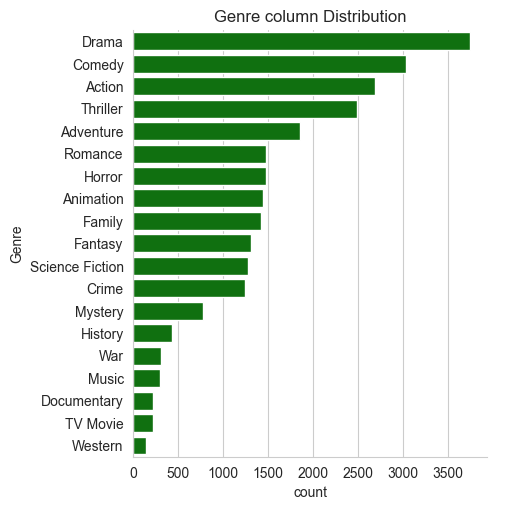

In [36]:
sns.catplot(y='Genre',data=df, kind='count',order=df['Genre'].value_counts().index,color='green')
plt.title('Genre column Distribution')
plt.xlabel('count')
plt.ylabel('Genre')
plt.show()

# 2. what genre has height vote Average


In [37]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [38]:
df['Vote_Average'].describe()

count       25793
unique          4
top       Average
freq         6613
Name: Vote_Average, dtype: object

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2447 (\N{BENGALI LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


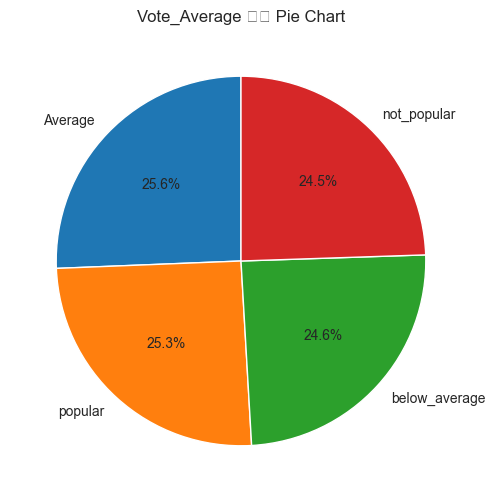

In [39]:
import matplotlib.pyplot as plt

# Vote_Average 
vote_average_counts = df['Vote_Average'].value_counts()

# Pie Chart 
plt.figure(figsize=(8, 6))
plt.pie(vote_average_counts.values, labels=vote_average_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Vote_Average এর Pie Chart')
plt.show()

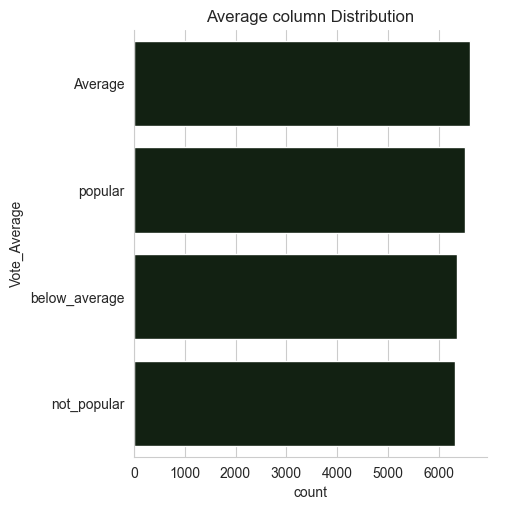

In [40]:
sns.catplot(y='Vote_Average',data=df, kind='count',order=df['Vote_Average'].value_counts().index,color='#0f2310')
plt.title('Average column Distribution')
plt.xlabel('count')
plt.ylabel('Vote_Average')
plt.show()

# 4.what is the most frequent genre of movies Release date in the year 2010


In [41]:
# Filter the DataFrame for movies released in 2010
movies_2010 = df[df['Release_Date'] == 2010]

# Count the occurrences of each genre for movies released in 2010
genre_counts_2010 = movies_2010['Genre'].value_counts()

# Get the most frequent genre
most_frequent_genre = genre_counts_2010.idxmax()

# Print the result
print("The most frequent genre of movies released in 2010 is:", most_frequent_genre)

The most frequent genre of movies released in 2010 is: Drama


# 5. what the movie got the height popularity


In [42]:
# Find the movie with the highest popularity
most_popular_movie = df.loc[df['Popularity'].idxmax(), 'Title']

# Print the result
print("The movie with the highest popularity is:", most_popular_movie)

The movie with the highest popularity is: Spider-Man: No Way Home


In [43]:
df[df['Popularity'] ==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# 6. What the movie got the height popularity

In [44]:
df[df['Popularity'] ==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


# 7.which year has the most filmed of the year

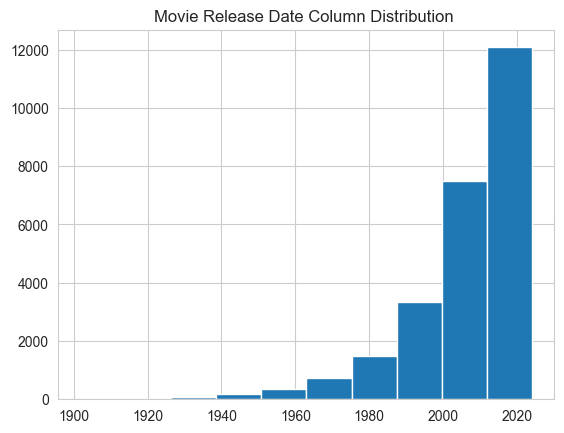

In [45]:
df['Release_Date'].hist()
plt.title('Movie Release Date Column Distribution ')
plt.show()

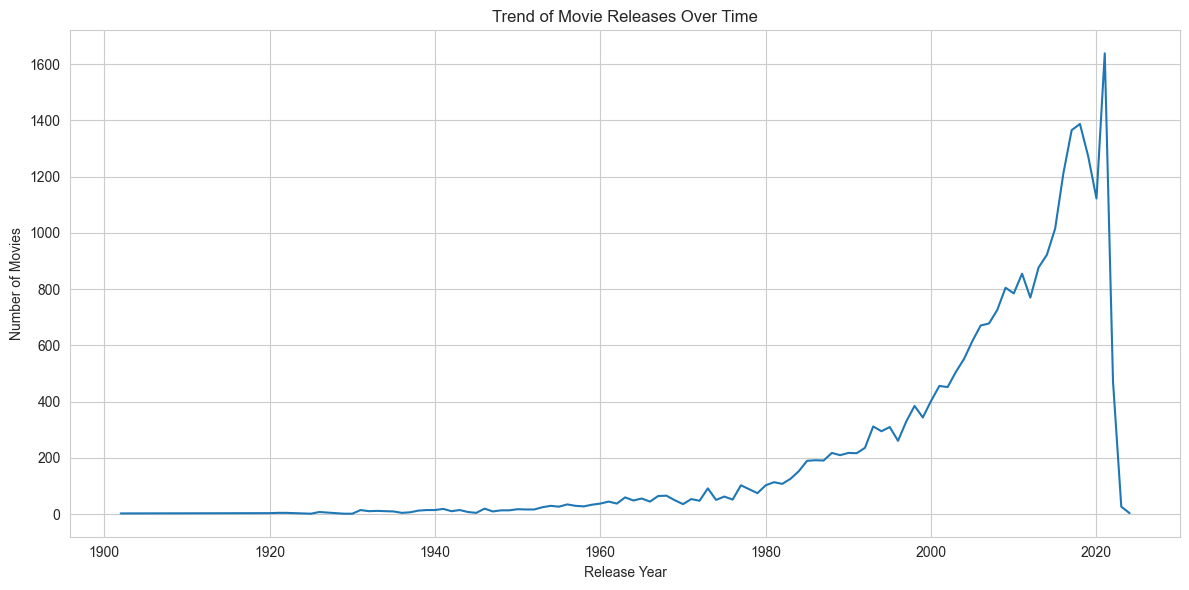

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group movies by release year and count the number of movies in each year
release_year_counts = df.groupby('Release_Date')['Title'].count().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release_Date', y='Title', data=release_year_counts)
plt.title('Trend of Movie Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

Conclusion:


### Q1. what is the most frequent genre of movies Release date
    Answer:
    Drama is the Most Frequent genre of Movies Release_Date
    
###  Q2. what genre has height vote Average
    Answer: 
    Vote-Average has Height Genre Average Movie
### Q3. what is the most frequent genre of movies Release date in the year 2010
    Answer:
    The most frequent genre of movies released in 2010 is: Drama


### Q4. What the movie got the height popularity
    Answer:
    The movie with the highest popularity is: Spider-Man: No Way Home

### Q5. which year has the most filmed of the year
    Answer:
    The year with the most films is: 2020